In [1]:
import torch

## Getting information about Tensor اطلاعات در مورد تنسور

- **shape** - چه شکل / ابعادی داره تنسور
- **dtype** - نوع اطلاعات در تنسور چی هست
- **device** - اطلاعات روی چه دستگاهی ذخیره شده GPU / 

In [2]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.3774, 0.0665, 0.5678, 0.2480],
        [0.0907, 0.8917, 0.1499, 0.7846],
        [0.7525, 0.3524, 0.1707, 0.8963]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


**Debuging note:**

- what shape are my tensors?
- what datatype are they?
- where are they stored? 

## Manipulating tensors (tensor operations)
## تغییر تنسورها

In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors.

A model learns by investigating those tensors and performing a series of operations (could be 1,000,000s+) on tensors to create a representation of the patterns in the input data.

These operations are often a wonderful dance between:

- Addition
- Substraction
- Multiplication (element-wise)
- Division
- Matrix multiplication

## Basic operations

### 1.Addition

In [3]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

### 2.Substraction

In [4]:
# Subtract and reassign
tensor = tensor - 3
tensor

tensor([-2, -1,  0])

### 3.Multiplication

In [5]:
# Multiply it by 10
tensor * 10

tensor([-20, -10,   0])

In [6]:
# Tensors don't change unless reassigned
tensor

tensor([-2, -1,  0])

In [7]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([-20, -10,   0])

In [8]:
# Can also use torch functions
torch.add(tensor, 10)

tensor([ 8,  9, 10])

## Matrix multiplication ضرب ماتریس ها، اصول پایه هوش مصنوعی

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

![visual demo of matrix multiplication](https://github.com/aidinism/deep-learning/raw/main/images/03-matrix-multiply.gif)


PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:
1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

> **Resource:** You can see all of the rules for matrix multiplication using `torch.matmul()` [in the PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html).


In [9]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape


torch.Size([3])

The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| ----- | ----- | ----- |
| **Element-wise multiplication** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Matrix multiplication** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |


In [12]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [13]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [15]:
# Can also use the "@" symbol for matrix multiplication, (not recommended)
tensor @ tensor

tensor(14)

You can do matrix multiplication by hand but it's not recommended.

The in-built `torch.matmul()` method is faster.

In [51]:
%%time
# Matrix multiplication by hand 
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 0 ns, sys: 2.16 ms, total: 2.16 ms
Wall time: 1.66 ms


tensor(14)

In [54]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 273 µs, sys: 95 µs, total: 368 µs
Wall time: 319 µs


tensor(14)

## One of the most common errors in deep learning (shape errors)

Because much of deep learning is multiplying and performing operations on matrices and matrices have a strict rule about what shapes and sizes can be combined, one of the most common errors you'll run into in deep learning is shape mismatches.

In [55]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

## torch.transpose  ترانهاده ماتریس

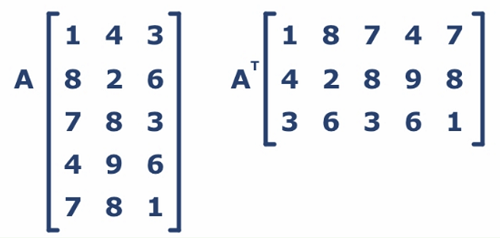

- torch.transpose(input, dim0, dim1) → Tensor
> - input (Tensor) – the input tensor.
> - dim0 (int) – the first dimension to be transposed
> - dim1 (int) – the second dimension to be transposed

- torch.t

- tensor.T

In [63]:
x = torch.randn(2, 3)
x

tensor([[-0.9966,  1.2431, -0.4141],
        [-0.0951,  0.5760,  1.0977]])

###  torch.transpose

In [67]:
torch.transpose(x, 0, 1)

tensor([[-0.9966, -0.0951],
        [ 1.2431,  0.5760],
        [-0.4141,  1.0977]])

### torch.t

In [68]:
torch.t(x)

tensor([[-0.9966, -0.0951],
        [ 1.2431,  0.5760],
        [-0.4141,  1.0977]])

### tensor.T

In [66]:
x.T

tensor([[-0.9966, -0.0951],
        [ 1.2431,  0.5760],
        [-0.4141,  1.0977]])